In [1]:
# run this cell

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import trafficFeaturing as tf

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Always make it pretty.
plt.style.use('ggplot')


In [2]:
#run this cell
traffic = tf.clean_data(tf.load_data())
traffic.shape

(275383, 21)

In [ ]:
traffic.iloc[:5,:20]


In [3]:
#run this cell
traffic = tf.add_previous(traffic,traffic.columns[3:])




In [4]:
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'RoadCategory', 'LinkLength_miles', 'PedalCycles', 'Motorcycles',
       'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon', 'previous_Estimation_method_detailed',
       'previous_RoadCategory', 'previous_LinkLength_miles',
       'previous_PedalCycles', 'previous_Motorcycles', 'previous_CarsTaxis',
       'previous_BusesCoaches', 'previous_LightGoodsVehicles',
       'previous_V2AxleRigidHGV', 'previous_V3AxleRigidHGV',
       'previous_V4or5AxleRigidHGV', 'previous_V3or4AxleArticHGV',
       'previous_V5AxleArticHGV', 'previous_V6orMoreAxleArticHGV',
       'previous_AllHGVs', 'previous_AllMotorVehicles', 'previous_Lat',
       'previous_Lon'],
      dtype='object')

In [5]:
cols = traffic.columns.tolist()
cols = cols[:5] + cols[6:] + [cols[5]]
traffic = traffic[cols]
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'RoadCategory', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon', 'previous_Estimation_method_detailed',
       'previous_RoadCategory', 'previous_LinkLength_miles',
       'previous_PedalCycles', 'previous_Motorcycles', 'previous_CarsTaxis',
       'previous_BusesCoaches', 'previous_LightGoodsVehicles',
       'previous_V2AxleRigidHGV', 'previous_V3AxleRigidHGV',
       'previous_V4or5AxleRigidHGV', 'previous_V3or4AxleArticHGV',
       'previous_V5AxleArticHGV', 'previous_V6orMoreAxleArticHGV',
       'previous_AllHGVs', 'previous_AllMotorVehicles', 'previous_Lat',
       'previous_Lon', 'LinkLength_miles'],
      dtype='object')

In [ ]:
#traffic flow of zero had to be removed
# traffic[traffic['CP'] == 80207]

In [ ]:
traf_2000 = traffic[traffic['AADFYear'] > 2000]
traf_2000_estimated = traf_2000[traf_2000['Estimation_method_detailed'] == "Estimated using previous year's AADF on this link"]

growth_factors = (traf_2000_estimated['AllMotorVehicles'] - traf_2000_estimated['previous_AllMotorVehicles']) / traf_2000_estimated['AllMotorVehicles']

print(np.min(growth_factors),np.max(growth_factors))

In [ ]:
traf_2000_estimated[growth_factors == 0.9874739039665971]

In [ ]:
traf_2000_estimated[traf_2000_estimated['CP'] == 80212]

In [ ]:
traf_2000_estimated[growth_factors == -1.8542015800813982]

In [ ]:
traf_2000_estimated[traf_2000_estimated['CP'] == 50712]

In [ ]:
traf_2000_estimated.head()

In [ ]:
traf_2000_estimated[traf_2000_estimated['CP'] == 501]

In [ ]:
truths = np.zeros(len(growth_factors))
for i,g in enumerate(growth_factors):
    if g >.05:
        truths[i] = 1
    elif g < -.05:
        truths[i] = 1
truths.sum()/len(truths)

In [ ]:
traffic.head()

In [ ]:
y = traffic[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]

#subsets of data
traffic_estimated = traffic[traffic['Estimation_method'] == 'Estimated']
traffic_counted = traffic[traffic['Estimation_method'] == 'Counted']
traffic_after2000 = traffic[traffic['AADFYear'] > 2000]
y_estimated = traffic_estimated[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
y_counted = traffic_counted[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
y_after2000 = traffic_after2000[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]

cols_to_drop = ['Estimation_method', 'Estimation_method_detailed','PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles']
traffic = traffic.drop(cols_to_drop,axis=1)
traffic_estimated = traffic_estimated.drop(cols_to_drop,axis=1)
traffic_counted = traffic_counted.drop(cols_to_drop,axis=1)
traffic_after2000 = traffic_after2000.drop(cols_to_drop,axis=1)

In [6]:
#run this cell
y = traffic[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
categorical_columns = ['RoadCategory', 'previous_Estimation_method_detailed', 'previous_RoadCategory','AADFYear'] 
traffic = pd.get_dummies(traffic,columns=categorical_columns)

traffic['AADFYear'] = y['AADFYear']
cols = traffic.columns.tolist()
cols = cols[-1:] + cols[:-1]
traffic = traffic[cols]

traffic_estimated = traffic[traffic['Estimation_method'] == 'Estimated']
traffic_counted = traffic[traffic['Estimation_method'] == 'Counted']
traffic_after2000 = traffic[traffic['AADFYear_2000'] == False]

y_estimated = y[traffic['Estimation_method'] == 'Estimated']
y_counted = y[traffic['Estimation_method'] == 'Counted']
y_after2000 = y[traffic['AADFYear_2000'] == False]



# y_estimated = traffic_estimated[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
# y_counted = traffic_counted[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
# y_after2000 = traffic_after2000[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]


In [7]:
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches',
       'LightGoodsVehicles', 'V2AxleRigidHGV', 'V3AxleRigidHGV',
       'V4or5AxleRigidHGV', 'V3or4AxleArticHGV', 'V5AxleArticHGV',
       'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles', 'Lat', 'Lon',
       'previous_LinkLength_miles', 'previous_PedalCycles',
       'previous_Motorcycles', 'previous_CarsTaxis', 'previous_BusesCoaches',
       'previous_LightGoodsVehicles', 'previous_V2AxleRigidHGV',
       'previous_V3AxleRigidHGV', 'previous_V4or5AxleRigidHGV',
       'previous_V3or4AxleArticHGV', 'previous_V5AxleArticHGV',
       'previous_V6orMoreAxleArticHGV', 'previous_AllHGVs',
       'previous_AllMotorVehicles', 'previous_Lat', 'previous_Lon',
       'LinkLength_miles', 'RoadCategory_PM', 'RoadCategory_PR',
       'RoadCategory_PU', 'RoadCategory_Pu', 'RoadCategory_TM',
       'RoadCategory_TR', 'RoadCategory_TU', 'RoadCategory_Tu'

In [ ]:
cols

In [ ]:
traffic.shape

In [ ]:
traffic_estimated.shape

In [ ]:
traffic_counted.shape

In [ ]:
traffic_after2000.shape

In [ ]:

categorical_columns = ['RoadCategory', 'previous_Estimation_method_detailed', 'previous_RoadCategory','AADFYear'] 
#, 'Road', 'previous Road' ,'StartJunction', 'EndJunction', 'previous StartJunction','previous EndJunction'

In [ ]:
#definitely DO NOT run this cell
traffic = pd.get_dummies(traffic,columns=categorical_columns)
traffic_estimated = pd.get_dummies(traffic_estimated,columns=categorical_columns)
traffic_counted = pd.get_dummies(traffic_counted,columns=categorical_columns)
traffic_after2000 = pd.get_dummies(traffic_after2000,columns=categorical_columns)
traffic_counted['RoadCategory_Tu'] = False
traffic_counted['previous_RoadCategory_Tu'] = False

# feat_engineering.head()

In [ ]:
growth_factors

In [ ]:
traffic_counted.columns

In [ ]:
cols = traffic.columns
cols

In [ ]:
traffic.columns == traffic_counted.columns

In [10]:
traffic.columns[17:]

Index(['Lat', 'Lon', 'previous_LinkLength_miles', 'previous_PedalCycles',
       'previous_Motorcycles', 'previous_CarsTaxis', 'previous_BusesCoaches',
       'previous_LightGoodsVehicles', 'previous_V2AxleRigidHGV',
       'previous_V3AxleRigidHGV', 'previous_V4or5AxleRigidHGV',
       'previous_V3or4AxleArticHGV', 'previous_V5AxleArticHGV',
       'previous_V6orMoreAxleArticHGV', 'previous_AllHGVs',
       'previous_AllMotorVehicles', 'previous_Lat', 'previous_Lon',
       'LinkLength_miles', 'RoadCategory_PM', 'RoadCategory_PR',
       'RoadCategory_PU', 'RoadCategory_Pu', 'RoadCategory_TM',
       'RoadCategory_TR', 'RoadCategory_TU', 'RoadCategory_Tu',
       'previous_Estimation_method_detailed_Automatic counter',
       'previous_Estimation_method_detailed_Dependent on a neighbouring counted link',
       'previous_Estimation_method_detailed_Estimated from nearby links',
       'previous_Estimation_method_detailed_Estimated using previous year's AADF on this link',
       'previ

In [ ]:
traffic.head()

In [22]:
train, test = tf.train_test_splitter(traffic,2016)

print(len(train), len(test), np.sum(test) + np.sum(train))

275383 275383 275383


In [11]:
#run this cell
X = traffic.values[:,17:]
X_estimated = traffic_estimated.values[:,17:]
X_counted = traffic_counted.values[:,17:]
X_after2000 = traffic_after2000.values[:,17:]

y_estimated_flow = y_estimated.values[:,4]
y_counted_flow = y_counted.values[:,4]

In [ ]:
X[0]

In [ ]:
y['Estimation_method_detailed'].value_counts()

In [ ]:
estimated_rows = (y['Estimation_method_detailed'] == 'Manual count') | (y['Estimation_method_detailed'] == 'Automatic counter')

In [ ]:
X.shape

In [ ]:
X_counted.shape

In [ ]:
logregress = LogisticRegression()

In [ ]:
traffic_estimated.head()

In [ ]:
275000/16

In [ ]:
linregress = LinearRegression()

In [ ]:
linregress.fit(X,y['AllMotorVehicles'])
linregress.score(X,y['AllMotorVehicles'])

In [12]:
#run this cell
forest2 = RandomForestRegressor()

In [ ]:
forest = RandomForestClassifier()

In [ ]:
X_estimated

In [13]:
#run this cell
forest2.fit(X_estimated,y_estimated_flow)
forest2.score(X_estimated,y_estimated_flow)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9993012639914326

In [14]:
#run this cell
kf = KFold(n_splits = 5,shuffle=True)

In [ ]:


list(kf.split(X_estimated,y_estimated_flow))

0.9966826863043095
0.9955542334323297
0.9959587294652744
0.9954094018718506
0.9964698748518505


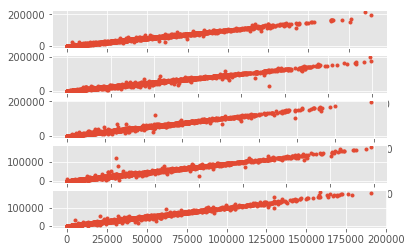

In [15]:
#run this cell
fig, axs = plt.subplots(5)

for i, (train, test) in enumerate(kf.split(X_estimated)):
    forest2.fit(X_estimated[train],y_estimated_flow[train])
    print(forest2.score(X_estimated[test],y_estimated_flow[test]))
    axs[i].plot(forest2.predict(X_estimated[test]),y_estimated_flow[test],".")

In [ ]:
traffic.columns


In [16]:
#run this cell
forest2.fit(X_counted, y_counted_flow)
forest2.score(X_counted, y_counted_flow)

0.9962747294103097

In [18]:
#run this cell
forest2.fit(X_estimated,y_estimated_flow)
forest2.score(X_counted,y_counted_flow)

0.9748200927003501

0.9792335593718816
0.9770179452281456
0.978759939021496
0.9783991322873118
0.9766108084324243


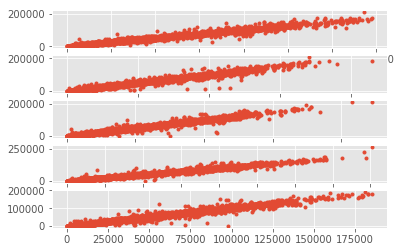

In [17]:
#run this cell
fig, axs = plt.subplots(5)

for i, (train, test) in enumerate(kf.split(X_counted)):
    forest2.fit(X_counted[train],y_counted_flow[train])
    print(forest2.score(X_counted[test],y_counted_flow[test]))
    axs[i].plot(forest2.predict(X_counted[test]),y_counted_flow[test],".")